In [1]:
import sys  
#!{sys.executable} -m pip install numpy
#"!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install seaborn

# ***Анализ датанных***

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

**Загрузка датасета**

In [3]:
df = pd.read_csv('salary.csv')

In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
1,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
2,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
3,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
4,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Первичная обработка данных**

In [5]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [6]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000,21841.000000
mean,21.546404,3.873770,7871.320590,10.293943,9.068449,2.614441,7.164003,1.445447,3.668971,0.670436,6.328099,1.979854,39.357218,35.763884,0.239595
std,13.586784,1.451805,4537.631267,3.866895,2.579103,1.502596,4.661748,1.603985,0.843871,0.470065,22.699910,9.706025,12.105608,7.644198,0.426846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,4017.000000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,4.000000,7787.000000,11.000000,9.000000,2.000000,8.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,31.000000,4.000000,11656.000000,12.000000,11.000000,4.000000,11.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,71.000000,8.000000,16107.000000,15.000000,15.000000,6.000000,15.000000,5.000000,4.000000,1.000000,115.000000,85.000000,90.000000,40.000000,1.000000


### Проверка на сбалансированность датасета

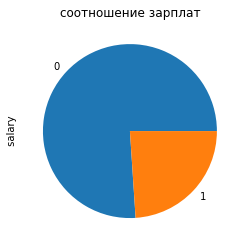

In [7]:
plt.figure()
pd.Series(df[' salary']).value_counts().sort_index().plot(kind = 'pie')
plt.title('соотношение зарплат');

Как видно из графика, набор данных не сбалансирован. Однако, это легко поправимо примитивным скриптом

In [8]:
import random

random.seed()
inp = open("salary.csv", "r")
file = open("dataset.csv", "w")
while True:
    line = inp.readline()
    if not line:
        break
    params = line.split(", ")
    if params[14] == ">50K\n" or params[14] == "salary\n" or random.randint(1, 3) < 2:
        file.write(line)
inp.close()
file.close()

In [9]:
df = pd.read_csv('dataset.csv')
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

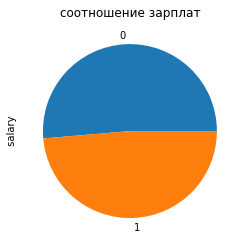

In [10]:
plt.figure()
pd.Series(df[' salary']).value_counts().sort_index().plot(kind = 'pie')
plt.title('соотношение зарплат');

Намного лучше. Теперь рассмотрим распределение признаков нашего датасета. Из графика можно заметить, что ряд параметров так или иначе коррелирует с размером зарплаты

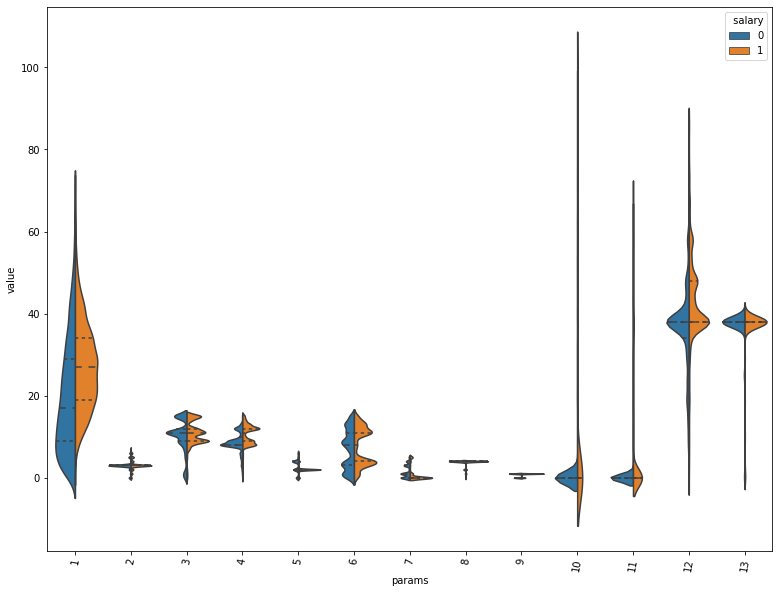

In [11]:
df_div = pd.melt(df, " salary",
                 ["age"," workclass"," education"," education-num"," marital-status"," occupation"," relationship"," race"," sex"," capital-gain"," capital-loss"," hours-per-week"," native-country"],
                 var_name="params")
fig, ax = plt.subplots(figsize=(13,10))
p = sns.violinplot(ax = ax, x="params", y="value", hue=" salary", split = True, data=df_div, inner = 'quartile')
df_no_class = df.drop([" salary"],axis = 1)
p.set_xticklabels(rotation = 80, labels = [int(i) for i in range(1, 14)]);

**Корреляционная матрица значений**

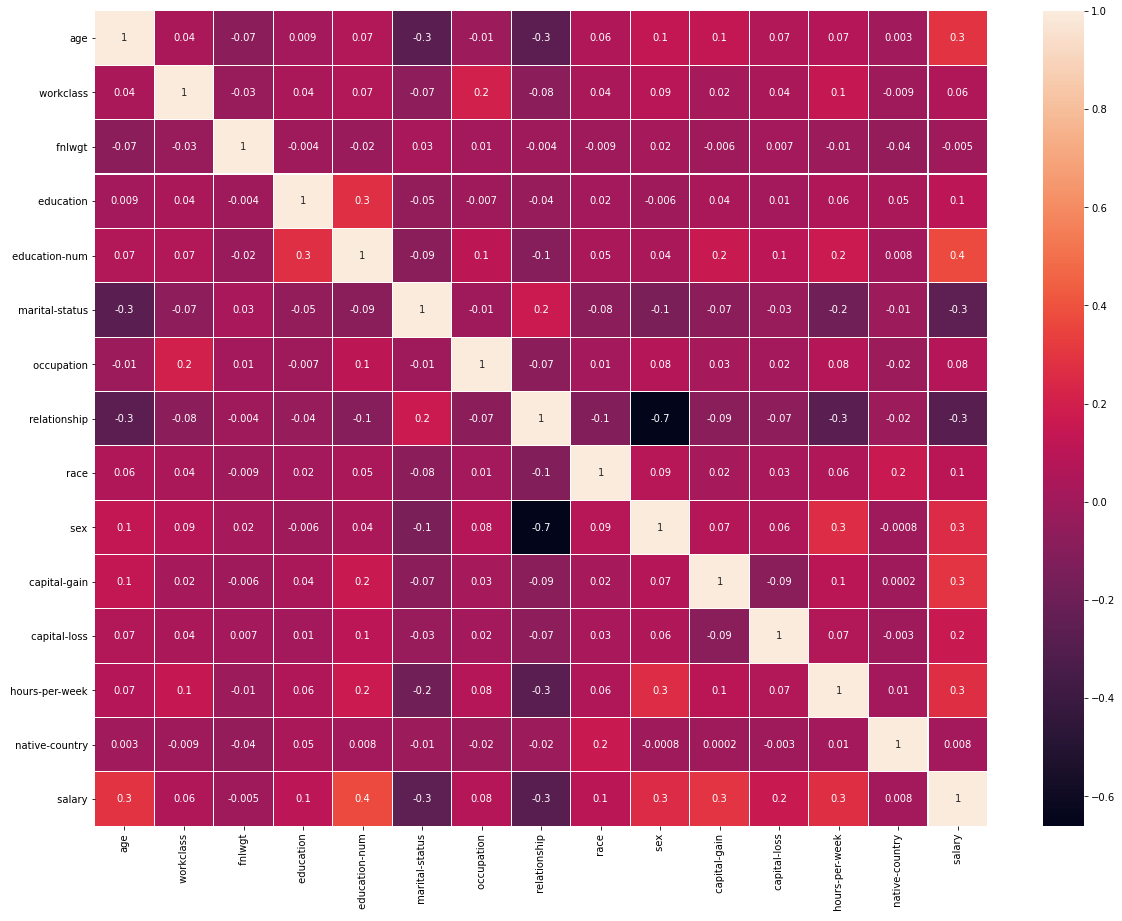

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1, annot=True, fmt='.1g')
plt.yticks(rotation=0);

У параметра ```education-num``` имеется заметная корреляция с зарплатой, проанализируем его.

In [13]:
df[[' salary', ' education-num']].groupby([' education-num'], as_index=False).mean().sort_values(by=' salary', ascending=False)

,education-num,salary
14,14,0.916667
15,15,0.884444
13,13,0.776970
12,12,0.657764
10,10,0.507157
11,11,0.478754
9,9,0.426941
8,8,0.363434
7,7,0.222222
3,3,0.179487


In [14]:
X = df.drop([' salary'], axis=1)
y = df[' salary']

# ***Сравнение реализаций алгоритмов***

In [15]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import BestMLFramework as bmlf


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [16]:
def cv(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds, random_state=16, shuffle=True)
    scores = np.zeros(k_folds)    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X.loc[train_index], y.loc[train_index]
        X_val, y_val = X.loc[val_index], y.loc[val_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        scores[i] = accuracy_score(y_val, y_pred)
    return scores

In [9]:
%%time
model = LogisticRegression()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.7306163885248326
CPU times: user 4 s, sys: 2.7 s, total: 6.7 s
Wall time: 2 s


In [18]:
%%time
model = bmlf.LR()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.5141132776230269
CPU times: user 39.1 s, sys: 27 s, total: 1min 6s
Wall time: 19.7 s


In [19]:
%%time
model = KNeighborsClassifier(n_neighbors=9)
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.6670380687093779
CPU times: user 867 ms, sys: 128 ms, total: 995 ms
Wall time: 823 ms


In [20]:
%%time
model = bmlf.KNN(9)
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())


Accuracy:  0.6670380687093779
CPU times: user 12.8 s, sys: 609 ms, total: 13.4 s
Wall time: 13.4 s


In [21]:
%%time
model = GaussianNB()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())


Accuracy:  0.7624883936861654
CPU times: user 91.3 ms, sys: 1.46 ms, total: 92.7 ms
Wall time: 92.8 ms


In [22]:
%%time
model = bmlf.NBC()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.7639740018570101
CPU times: user 606 ms, sys: 11.8 ms, total: 617 ms
Wall time: 611 ms


In [9]:
%%time
model = DecisionTreeClassifier()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.7647968759627173
CPU times: user 322 ms, sys: 4.01 ms, total: 326 ms
Wall time: 322 ms


In [7]:
%%time
model = bmlf.Node()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.7729101095665143
CPU times: user 7min 5s, sys: 110 ms, total: 7min 5s
Wall time: 7min 5s


In [15]:
%%time
model = RandomForestClassifier()
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.8198546563905775
CPU times: user 5.82 s, sys: 4.11 ms, total: 5.82 s
Wall time: 5.82 s


In [17]:
%%time
model = bmlf.RF(num_trees=100)
scores = cv(model, X, y)
print("Accuracy: ", scores.mean())

Accuracy:  0.8031613203161321
CPU times: user 10.8 s, sys: 9.03 ms, total: 10.8 s
Wall time: 10.8 s


для Random Forest внутри алгоритма используется реализация дерева решений из sklearn, т.к. я устал ждать, пока прогонится мой неоптимизированный вариант